# **Conformal Geometric Algebra**

Conformal geometry studies *conformal structures*, or, *conformal trasnformations*.
Topology is concerned with preserving connectivity (e.g. number of holes), while
conformal geometry is concerned with preserving angles.
Note that "conformity" is a stronger notion than topology, in the sense
that a conformal equivalence implies topological equivalence.

When modelling geometric objects, we can deal with different levels of abstraction. For example,
if we want to create a type "Triangle" that encapsulates all triangles, what is the "correct" equivalence
class to use for such modelling? We know that, from the start, a triangle has three vertices with v1
connected to v2, v2 connected to v3 and v1. From an topological perspective, this view is yet lacking. We don't
know if the triangle is filled or not, hence, it could either have one hole or zero holes. For our case,
let's suppose that a triangle is filled, i.e. it's a simpicial complex of $[v1,v2,v3,[v1,v2], [v2,v3],[v3,v1],[v1,v2,v3]]$.
Once this is defined, then we've characterized triangles topologically. Yet, note that, topologically, a triangle is the same
as a filled circle. Hence, the topology does not actually capture the "shape" of the triangle. This is done with
conformal equivalence.

Hence, besides the simplicial complex description (which is the algebraic topology), we need an algebraic conformal description.
This will be done using Geometric Algebra with the Conformal Model.


## 1. CGA Model

Our goal is to model 3D space in a way that conformal transformations can be algebraically represented. Besides the algebraic
representation, we want our transformations to be covariant, in the sense that applying one conformal transformation preserves
the algebraic structure of our object. This can be achieved by using the Conformal Geometric Algebra Model (CGA).

In this model, we actually represent the existing objects as living in a 5D space,
i.e. we use two extra dimensions in order to better distinguish objects.
For example, a vector in 3D space could be modeled as an array with three entries.
In a similar manner, a point in space could also be modeled in the same way.
The problem becomes that we cannot distinguish between a point and a vector.

Therefore, the Conformal Model in an $\mathbb R^{3+1,1}$ multivector space.
In this model, we thus have the following base vectors $\{e_1,e_2,e_3,e_-, e_+\}$.
The first three are the base vectors of the actual space, while the last two
are special base vectors, where $e_-^2= -1$. Note that, in the Conformal Model, we actually use
a slightly different base. Instead of $e_-$ and $e_+$ we use

$$
    n_\infty := e_+ + e_- , \quad n_o = e_+ - e_-.
$$

**NOTE**: The definintion of $n_\infty$ and $n_0$ varies a lot from author to author. Here we are following the convention of Leo Dorst. Note that,
for exemple, there is a different convention used by Fernandes et. al.

#### IMPLEMENTATION

Let's use Julia to start using our CGA model. For that, let's use the
`CliffordAlgebras.jl` package, which already implements the underlying geometric algebra.

In [17]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`
┌ Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
│   err = ArgumentError("Package PlotlyBase not found in current path.\n- Run `import Pkg; Pkg.add(\"PlotlyBase\")` to install the PlotlyBase package.")
└ @ Plots /home/davibarreira/.julia/packages/Plots/M4dfL/src/backends.jl:545


In [18]:
cl = CliffordAlgebra(:CGA3D)

e1 = cl.e1
e2 = cl.e2
e3 = cl.e3
e₊ = cl.e₊
e₋ = cl.e₋
I  = pseudoscalar(cl)

no = cl.e₊ + cl.e₋
n∞ = cl.e₊ - cl.e₋

propertynames(cl)

(:𝟏, :e1, :e2, :e3, :e₊, :e₋, :e1e2, :e1e3, :e2e3, :e1e₊, :e2e₊, :e3e₊, :e1e₋, :e2e₋, :e3e₋, :e₊e₋, :e1e2e3, :e1e₊e2, :e1e3e₊, :e2e₊e3, :e1e2e₋, :e1e₋e3, :e2e3e₋, :e1e₊e₋, :e2e₋e₊, :e3e₊e₋, :e1e2e3e₊, :e1e2e₋e3, :e1e2e₊e₋, :e1e3e₋e₊, :e2e3e₊e₋, :e1e2e3e₊e₋)

Note that `cl` is our algebra, and above we have the list of blade bases, which consists in a total
of $2^5 = 32$ blades.

In [19]:
@show cl.e₊ ⋅ cl.e₊
@show cl.e₋ ⋅ cl.e₋;

cl.e₊ ⋅ cl.e₊ = +1 ∈ Cl(4, 1, 0)
cl.e₋ ⋅ cl.e₋ = -1 ∈ Cl(4, 1, 0)


## 2. Representing Geometric Objects

### 2.1 Points

Now, one of the goals of using our CGA model is to be able to differentiate objects such as points and vectors.
In this model, a point is the same as a *null vector*. Remember, the norm square of a vector
is $\langle v, v \rangle$. Hence, a point is just a vector $v_p$ where $\langle v_p, v_p \rangle = 0$ in our CGA model.

You might wonder if the fact that the norm is zero, if this does not imply that the vector is just the zero vector.
Yet, since $\langle e_-, e_-\rangle = -1$, it turns out we can actually construct non-null vectors.

Consider a vector $v \in \mathbb R^3$. We want to apply a function $F: \mathbb R^3 \to \mathbb R^{4,1}$,
such that $\langle F(v), F(v) \rangle = 0$, i.e. it's a null vector in the CGA model.

Let $v = \alpha_1 e_1 + \alpha_2 e_2 + \alpha_3 e_3$, therefore, our function to find null vectors in CGA is:
$$
F(v) = \frac{1}{2} \left(-n_0 + 2v  + (v \cdot v) n_\infty
\right)
= \frac{-n_0}{2} + \alpha_1 e_1 + \alpha_2 e_2 + \alpha_3 e_3  + \frac{\sum^3_{i=1} \alpha_i^2 n_\infty}{2}
$$

Note that this function satisfies the property of taking vectors and turning them into null vectors in the CGA space:
$$
F(v)^2 = F(v) \cdot F(v) = \frac{1}{4}(- n_0 + 2v + v^2 n_\infty) \cdot (- n_0 + 2v + v^2 n_\infty)\\
= - \frac{1}{2}v^2 n_\infty \cdot n_0 + v^2 = - v^2 + v^2 = 0.
$$

The $\frac{1}{2}$ factor in our formula of $F$ is not necessary for nullifying the vector, instead,
this factor is added in order to "normalize" our multivector, i.e. $F(v) \cdot n_\infty = -1.$


Another interesting thing to note is that the inner product between two points will give their Euclidean distance, i.e.
$$
F(v) \cdot F(u) = -\frac{1}{2} (u - v)^2
$$

In [164]:
point(x=0,y=0,z=0)  = -no/2 + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2)/2 * n∞
point(;x=0,y=0,z=0) = -no/2 + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2)/2 * n∞

# Point from vector
F(x) = -no/2 + x + (x ⋅ x)*n∞/2

F (generic function with 1 method)

In [165]:
p = point(1,2,3)
@show p ⋅ n∞
@show p == F(cl.e1 + 2cl.e2 + 3cl.e3);

p ⋅ n∞ = -1.0 ∈ Cl(4, 1, 0)
p == F(cl.e1 + 2 * cl.e2 + 3 * cl.e3) = true


Checking the point distance: 

In [166]:
u = [1,1]
v = [3,2]
pu = point(u...)
pv = point(v...)

-norm_sqr(u - v)/2  ≈ scalar(pu ⋅ pv)

true

### 2.2 Affine Combination of Points

Now, suppose that we have two points, $p$ and $q$. We want to do an affine combination in order
to obtain interpolated points, e.g.
$$
\lambda\mathbf p + (1-\lambda) \mathbf q.
$$

We cannot simply do
$$
\lambda p + (1-\lambda) q.
$$
in our conformal model, because the result of
this sum would not be a point in our conformal model.

For this to work, we have to use *flat points*. A flat point is $p \wedge \mathbf n_\infty$.
Thus:
$$
\lambda(p\wedge \mathbf n_\infty) + (1-\lambda) (q \wedge \mathbf n_\infty) = 
F(\lambda\mathbf p + (1-\lambda) \mathbf q)
\wedge \mathbf n_\infty.
$$

Note that the result is a *flat point*

In [332]:
function getblades(x,blades = [:e1,:e2,:e3])
    cl = algebra(x)
    mapreduce(b->reduce(*,getproperty.([m,cl],b)),+,[:e1,:e2,:e3])
end

getblades(m)


+1.0×e1+3.0×e2+0.5×e3 ∈ Cl(4, 1, 0)

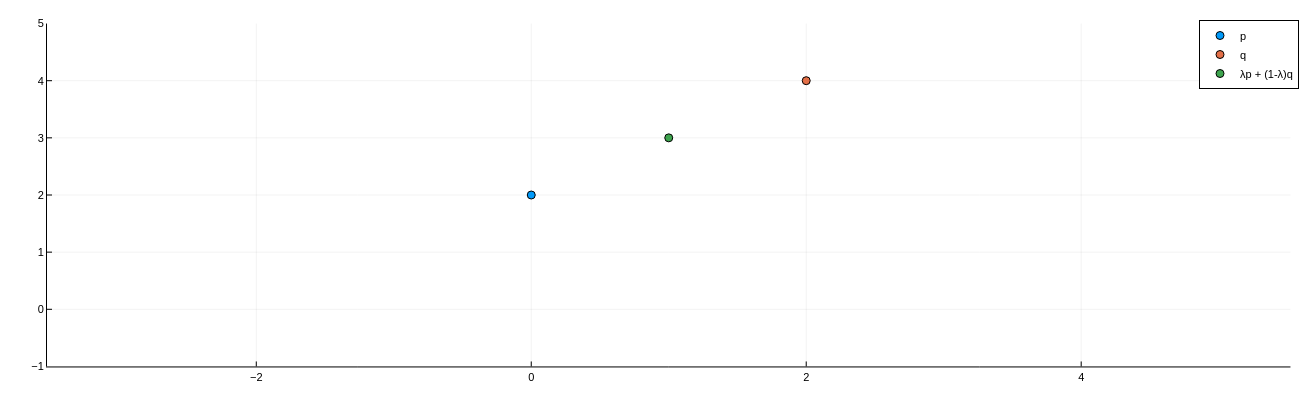

In [303]:
p = point(0,2,0)
q = point(2,4,1)
λ = 0.5
m = (λ*(p ∧ n∞) + (1-λ)*(q ∧ n∞))*no/2
# m = λ*[p.e1,p.e2] + (1-λ)*[q.e1,q.e2]

p1 = scatter([p.e1],[p.e2],label="p")
p1 = scatter!([q.e1],[q.e2],label="q", aspect_ratio=1,ylims=(-1,5))
p1 = scatter!([m.e1],[m.e2],legend=true,label="λp + (1-λ)q")
# p1 = scatter!([m[1]],[m[2]],legend=true,label="λp + (1-λ)q")

In [241]:
m ⋅ m

+20.0+1.0×e1e₊+3.0×e2e₊+1.0×e1e₋+3.0×e2e₋+20.0×e₊e₋ ∈ Cl(4, 1, 0)

## 3. Transformations in the Conformal Model

### 3.1 Rotors

The first transformation we deal with are rotors. Remember, a rotor is a transformation
with unit norm constructed via the product of an even number of invertible vectors. The application
of a rotor in the Euclidean Geometry is done via a sandwiching, e.g.
$R x \tilde{R}$. One can show that $R x n_\infty \tilde{R} = R x \tilde{R} n_\infty$
and $R x n_0 \tilde{R} = R x \tilde{R} n_0$.

Using this fact, we can show that:

$$
R F(\mathbf x) \tilde{R} = F(R \mathbf x \tilde{R}),
$$

which means that a rotor that acts as a rotation in the Euclidean space also does the same in our Conformal Model.

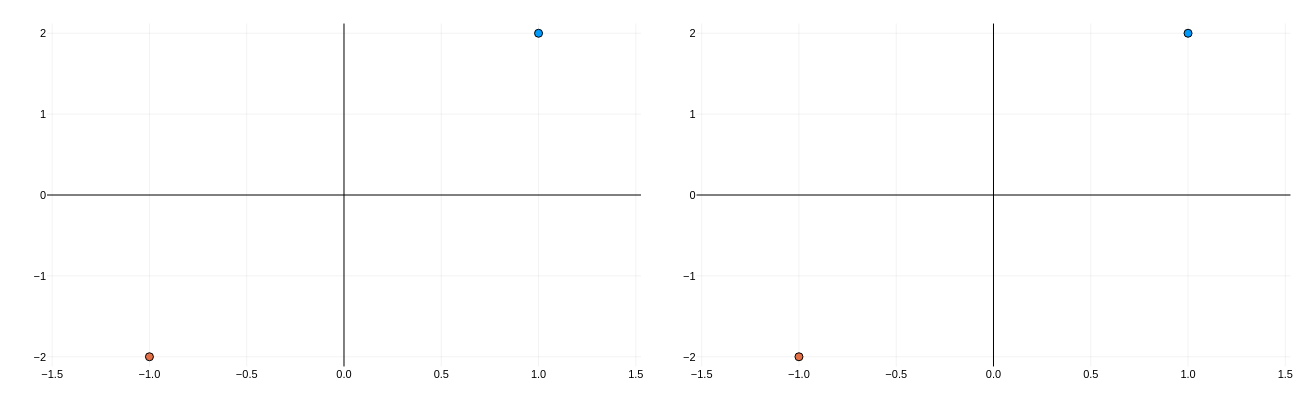

In [231]:
x = cl.e1 + 2cl.e2 + 0cl.e3

R = cl.e1 * cl.e2

Rx = R*x*reverse(R)

Fx  = F(x)
RFx = R*x*reverse(R)

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([Rx.e1],[Rx.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);

p2 = scatter([Fx.e1],[Fx.e2])
p2 = scatter!([RFx.e1],[RFx.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);

plot(p1,p2)

## 3.2 Inversion

Next, suppose that we have a point $F(\mathbf x)$. We know that we can invert $\mathbf x$
by 

$$
\mathbf x^{-1} = \frac{\mathbf x}{\mathbf x \mathbf x}.
$$

The way of doing this in our conformal model is by reflecting on the base vector $e$ and normalizing.
$$
F(\mathbf x^{-1}) = \frac{-\mathbf e F(\mathbf x) \mathbf e}{\mathbf x\mathbf x}.
$$

In [106]:
x = cl.e1 + 2cl.e2 + 0cl.e3
F(inv(x)) ≈ -(cl.e₊ * F(x) * cl.e₊)/(x*x)

true

## 3.3 Translations

Given a vector $\mathbf x$ the translation can be computed as $\mathbf x + \mathbf a$. To represent this in our model,
we want to apply it as a versor that guarantees that our objects preserve their properties. For example,
if we want to translate a circle, we want it to preserve the radius.

In the conformal model, every conformal transformation (which includes translations) can be represented as versors.
The translation can be represented as reflecting over a plane. The problem with a single reflection is that
it will mirror the original object. Yet, if we reflect on two planes, we get the translation without the mirroring, as shown below.

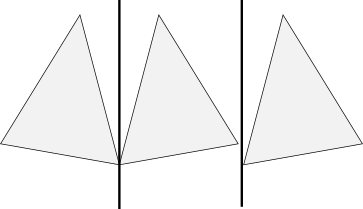

Thus, a translation will be written as a double reflection.

Let $\mathbf a$ be the translation vector, the translation rotor can be written as

$$
T_{\mathbf a} = \left(
1 + \frac{\mathbf n_\infty \mathbf a}{2}
\right) =\exp\left(
\frac{\mathbf n_\infty \mathbf a}{2}
\right).
$$

We then have:
$$
T_{\mathbf a} F(\mathbf x) \tilde{T_{\mathbf a}} = F(\mathbf x +\mathbf a).
$$

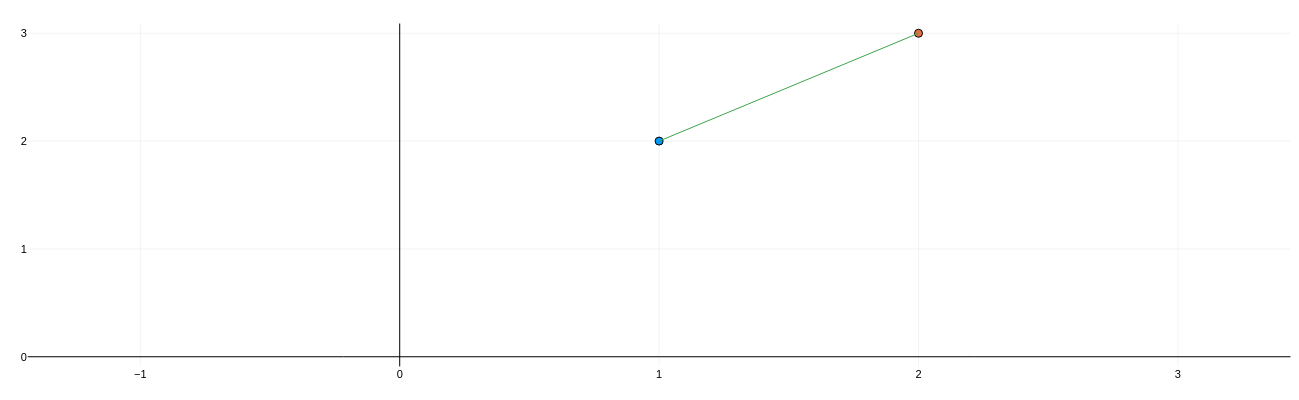

In [115]:
x = cl.e1 + 2cl.e2 + 0cl.e3
a = cl.e1 + cl.e2
Ta = exp(n∞*a/2)

x_t = Ta * F(x) * reverse(Ta)

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([x_t.e1],[x_t.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);
p1 = quiver!([x.e1],[x.e2],quiver=([a.e1],[a.e2]))

## 3.4 Dilations

In [163]:
dx 
exp(α)*F(exp(-α)*x)

exp(cl.e₊*cl.e₋/2)

+1.1276259652063807+0.5210953054937474×e₊e₋ ∈ Cl(4, 1, 0)

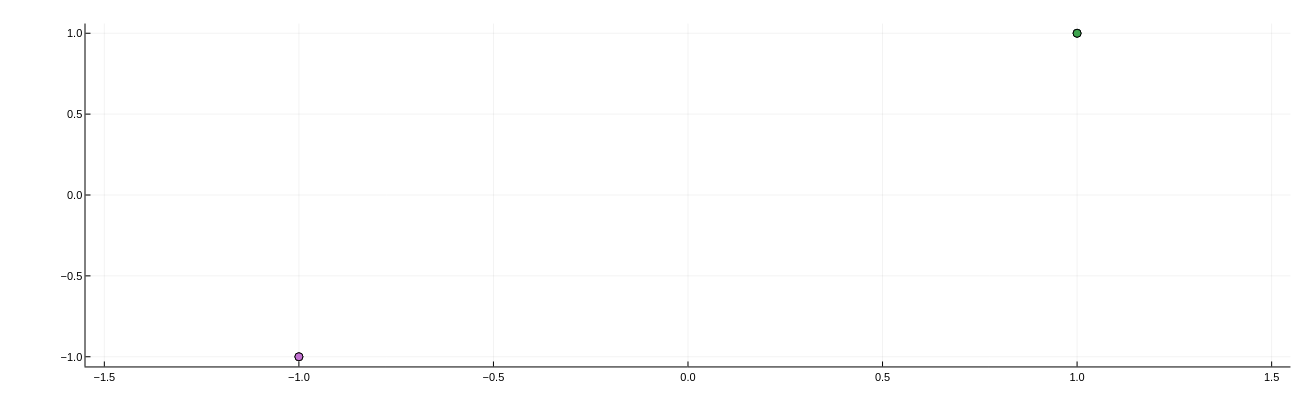

In [150]:
D(α) = exp(α*cl.e₊*cl.e₋/2)
x = cl.e1 + cl.e2
y = -cl.e1 - cl.e2
α = 2
dx = D(α)*F(x)*reverse(D(α))
dy = D(α)*F(y)*reverse(D(α))

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([y.e1],[y.e2],legend=false, aspect_ratio=1)
p1 = scatter!([dx.e1],[dx.e2])
p1 = scatter!([dy.e1],[dy.e2])